# EDA Asia Population 2020

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Give me data

In [22]:
# Reading data
df = pd.read_csv('data\AsiaPopulation2020.csv')
df.head(10)

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04
2,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56.0,0.13
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11
5,Bhutan,771608,1.12,8516,20,38117,320,2.0,28,46.0,0.01
6,Brunei,437479,0.97,4194,83,5270,0,1.8,32,80.0,0.01
7,Cambodia,16718965,1.41,232423,95,176520,-30000,2.5,26,24.0,0.21
8,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
9,Cyprus,1207359,0.73,8784,131,9240,5000,1.3,37,67.0,0.02


- Country: Unique Identifier
- Population: Population of the Country
- YearlyChange: Yearly Population Change in Percentage
- NetChange: Net change in Population
- Density: (P/Km²)
- Land Area: (Km²)
- Migrants: Net Migrants
- FertRate: Fertility Rate
- MedAge: Median Age
- UrbanPop: Urban Population in Percentage
- WorldShare: World population share of country in percentage


## Let's look at the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       51 non-null     object 
 1   Population    51 non-null     int64  
 2   YearlyChange  51 non-null     float64
 3   NetChange     51 non-null     int64  
 4   Density       51 non-null     int64  
 5   LandArea      51 non-null     int64  
 6   Migrants      51 non-null     int64  
 7   FertRate      51 non-null     float64
 8   MedAge        51 non-null     int64  
 9   UrbanPop      47 non-null     float64
 10  WorldShare    51 non-null     float64
dtypes: float64(4), int64(6), object(1)
memory usage: 4.5+ KB


In [10]:
df.shape

(51, 11)

In [5]:
df.describe()

,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
count,5.100000e+01,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000,47.000000,51.000000
mean,9.100107e+07,1.267843,7.781094e+05,997.647059,6.084928e+05,-33904.235294,2.331373,30.862745,58.446809,1.168039
std,2.748929e+08,0.822083,2.111831e+06,3321.752241,1.430488e+06,135241.664715,0.805603,6.785336,22.701090,3.526507
min,4.374790e+05,-0.440000,-3.838400e+05,2.000000,3.000000e+01,-532687.000000,1.100000,18.000000,18.000000,0.010000
25%,5.104020e+06,0.805000,4.749550e+04,73.500000,2.505500e+04,-30006.000000,1.900000,26.000000,37.000000,0.070000
50%,1.671896e+07,1.300000,1.198730e+05,123.000000,1.433500e+05,-4000.000000,2.100000,30.000000,58.000000,0.210000
75%,4.574584e+07,1.710000,5.367205e+05,357.500000,4.904100e+05,23236.000000,2.800000,34.500000,78.500000,0.590000
max,1.439324e+09,3.680000,1.358663e+07,21645.000000,9.388211e+06,283922.000000,4.600000,48.000000,96.000000,18.470000


In [11]:
df.median()

Population      16718965.00
YearlyChange           1.30
NetChange         119873.00
Density              123.00
LandArea          143350.00
Migrants           -4000.00
FertRate               2.10
MedAge                30.00
UrbanPop              58.00
WorldShare             0.21
dtype: float64

In [13]:
df.isnull().sum()

Country         0
Population      0
YearlyChange    0
NetChange       0
Density         0
LandArea        0
Migrants        0
FertRate        0
MedAge          0
UrbanPop        4
WorldShare      0
dtype: int64

In [21]:
df[df['UrbanPop'].isnull()]

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
11,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10
20,Kuwait,4270571,1.51,63488,240,17820,39520,2.1,37,NaN,0.05
24,Macao,649335,1.39,8890,21645,30,5000,1.2,39,NaN,0.01
36,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,NaN,0.08


City-countries seem to have an UrbanPop of NaN, is Kuwait a city-country?

## Highest population

In [25]:
df_hi = df.sort_values(by='Population', ascending=False).head(5)
df_hi

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
8,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
12,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
13,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
32,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83
4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11


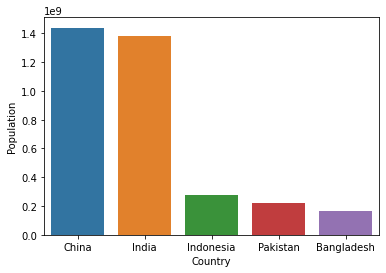

In [27]:
sns.barplot(data=df_hi, x='Country', y='Population')
plt.show()

## Lowest population

In [28]:
df_lo = df.sort_values(by='Population', ascending=True).head(5)
df_lo

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
6,Brunei,437479,0.97,4194,83,5270,0,1.8,32,80.0,0.01
26,Maldives,540544,1.81,9591,1802,300,11370,1.9,30,35.0,0.01
24,Macao,649335,1.39,8890,21645,30,5000,1.2,39,NaN,0.01
5,Bhutan,771608,1.12,8516,20,38117,320,2.0,28,46.0,0.01
9,Cyprus,1207359,0.73,8784,131,9240,5000,1.3,37,67.0,0.02


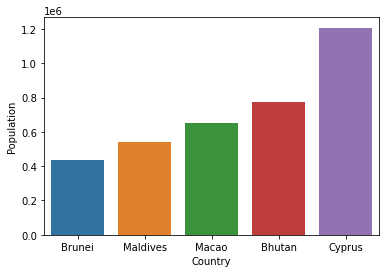

In [29]:
sns.barplot(data=df_lo, x='Country', y='Population')
plt.show()

## Not enough land

In [83]:
df_sl = df.sort_values(by='LandArea', ascending=True).head(5)
df_sl

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
24,Macao,649335,1.39,8890,21645,30,5000,1.2,39,NaN,0.01
26,Maldives,540544,1.81,9591,1802,300,11370,1.9,30,35.0,0.01
36,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,NaN,0.08
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
11,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10


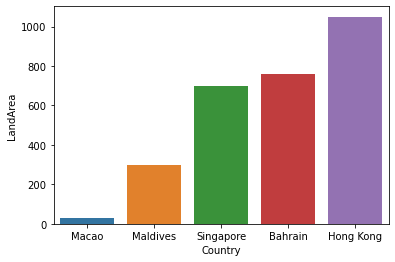

In [84]:
sns.barplot(data=df_sl, x='Country', y='LandArea')
plt.show()

### What about population density?

In [32]:
df_nel = df.sort_values(by='Density', ascending=False).head(5)
df_nel

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
24,Macao,649335,1.39,8890,21645,30,5000,1.2,39,NaN,0.01
36,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,NaN,0.08
11,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
26,Maldives,540544,1.81,9591,1802,300,11370,1.9,30,35.0,0.01


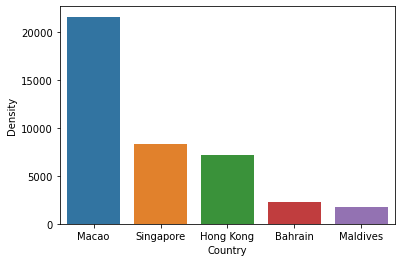

In [36]:
sns.barplot(data=df_nel, x='Country', y='Density')
plt.show()

### Density is high but YearlyChange is also high 
- Average YearlyChange of all countries: 1.268
- Average YearlyChange of not enough land: 1.698

In [46]:
df_nel['YearlyChange'].mean(), df['YearlyChange'].mean()

(1.698, 1.2678431372549022)

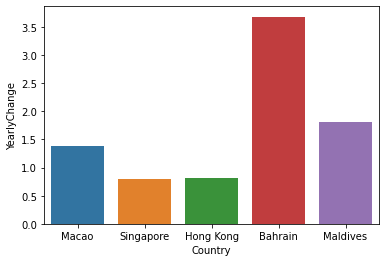

In [39]:
sns.barplot(data=df_nel, x='Country', y='YearlyChange')
plt.show()

## Who has a lot of land?

In [81]:
df_bl = df.sort_values(by='LandArea', ascending=False).head(5)
df_bl

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
8,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
12,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
19,Kazakhstan,18776707,1.21,225280,7,2699700,-18000,2.8,31,58.0,0.24
35,Saudi Arabia,34813871,1.59,545343,16,2149690,134979,2.3,32,84.0,0.45
13,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51


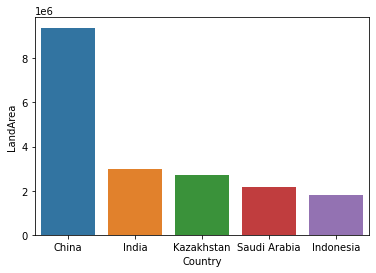

In [82]:
sns.barplot(data=df_bl, x='Country', y='LandArea')
plt.show()

### But what about lowest population density?

In [37]:
df_enl = df.sort_values(by='Density', ascending=True).head(5)
df_enl

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
27,Mongolia,3278290,1.65,53123,2,1553560,-852,2.9,28,67.0,0.04
19,Kazakhstan,18776707,1.21,225280,7,2699700,-18000,2.8,31,58.0,0.24
46,Turkmenistan,6031200,1.50,89111,13,469930,-5000,2.8,27,53.0,0.08
35,Saudi Arabia,34813871,1.59,545343,16,2149690,134979,2.3,32,84.0,0.45
31,Oman,5106626,2.65,131640,16,309500,87400,2.9,31,87.0,0.07


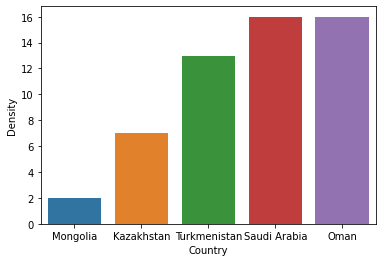

In [38]:
sns.barplot(data=df_enl, x='Country', y='Density')
plt.show()

### Density is low but YearlyChange is high 
- Average YearlyChange of all countries: 1.268
- Average YearlyChange of a lot of land: 1.72

In [47]:
df_enl['YearlyChange'].mean(), df['YearlyChange'].mean()

(1.72, 1.2678431372549022)

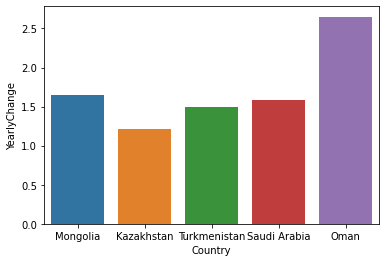

In [40]:
sns.barplot(data=df_enl, x='Country', y='YearlyChange')
plt.show()

## Which country's population is declining?

In [48]:
df_dec = df.sort_values(by='YearlyChange', ascending=True).head(5)
df_dec

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
23,Lebanon,6825445,-0.44,-30268,667,10230,-30012,2.1,30,78.0,0.09
17,Japan,126476461,-0.30,-383840,347,364555,71560,1.4,48,92.0,1.62
10,Georgia,3989167,-0.19,-7598,57,69490,-10000,2.1,38,58.0,0.05
37,South Korea,51269185,0.09,43877,527,97230,11731,1.1,44,82.0,0.66
41,Taiwan,23816775,0.18,42899,673,35410,30001,1.2,42,79.0,0.31


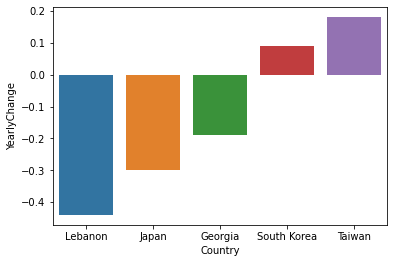

In [49]:
sns.barplot(data=df_dec, x='Country', y='YearlyChange')
plt.show()

## Which country's YearlyChange is under average?

In [53]:
avg = df['YearlyChange'].mean()
avg

1.2678431372549022

In [65]:
df_yc = df[df['YearlyChange'] < avg].sort_values(by='YearlyChange', ascending=True)

In [66]:
len(df_yc), len(df)

(25, 51)

In [67]:
df_yc.head(5)

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
23,Lebanon,6825445,-0.44,-30268,667,10230,-30012,2.1,30,78.0,0.09
17,Japan,126476461,-0.30,-383840,347,364555,71560,1.4,48,92.0,1.62
10,Georgia,3989167,-0.19,-7598,57,69490,-10000,2.1,38,58.0,0.05
37,South Korea,51269185,0.09,43877,527,97230,11731,1.1,44,82.0,0.66
41,Taiwan,23816775,0.18,42899,673,35410,30001,1.2,42,79.0,0.31


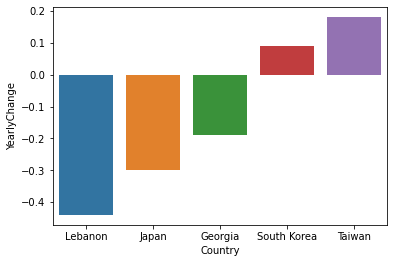

In [72]:
sns.barplot(data=df_yc.head(5), x='Country', y='YearlyChange')
plt.show()

## So which country has highest YearlyChange?

In [76]:
df_yh = df.sort_values(by='YearlyChange', ascending=False).head(10)
df_yh

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
31,Oman,5106626,2.65,131640,16,309500,87400,2.9,31,87.0,0.07
40,Syria,17500658,2.52,430523,95,183630,-427391,2.8,26,60.0,0.22
39,State of Palestine,5101414,2.41,119994,847,6020,-10563,3.7,21,80.0,0.07
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
15,Iraq,40222493,2.32,912710,93,434320,7834,3.7,21,73.0,0.52
42,Tajikistan,9537645,2.32,216627,68,139960,-20000,3.6,22,27.0,0.12
50,Yemen,29825964,2.28,664042,56,527970,-30000,3.8,20,38.0,0.38
32,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83
44,Timor-Leste,1318445,1.96,25326,89,14870,-5385,4.1,21,33.0,0.02


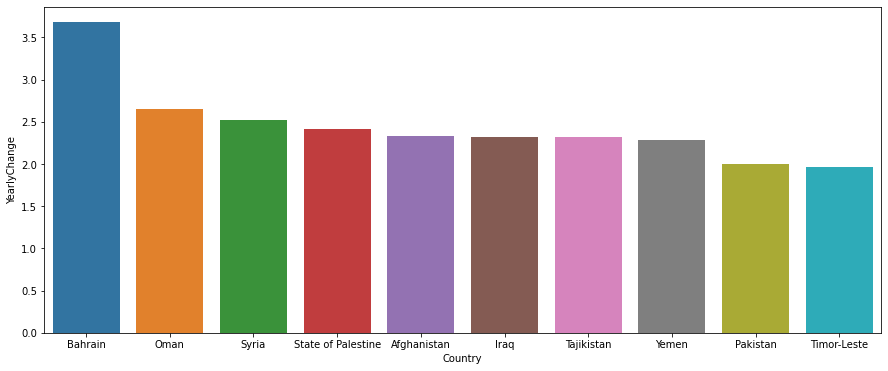

In [79]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_yh, x='Country', y='YearlyChange')
plt.show()

## Which country is the youngest?

In [87]:
df_yg = df.sort_values(by='MedAge', ascending=True).head(5)
df_yg

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
50,Yemen,29825964,2.28,664042,56,527970,-30000,3.8,20,38.0,0.38
44,Timor-Leste,1318445,1.96,25326,89,14870,-5385,4.1,21,33.0,0.02
39,State of Palestine,5101414,2.41,119994,847,6020,-10563,3.7,21,80.0,0.07
15,Iraq,40222493,2.32,912710,93,434320,7834,3.7,21,73.0,0.52


## Which country is the oldest?
- These countries are prosperous but they are getting old.

In [88]:
df_od = df.sort_values(by='MedAge', ascending=False).head(5)
df_od

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
17,Japan,126476461,-0.30,-383840,347,364555,71560,1.4,48,92.0,1.62
11,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10
37,South Korea,51269185,0.09,43877,527,97230,11731,1.1,44,82.0,0.66
41,Taiwan,23816775,0.18,42899,673,35410,30001,1.2,42,79.0,0.31
36,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,NaN,0.08
